<a href="https://colab.research.google.com/github/alejandra74/Topicos_de_Informacao_I/blob/main/prova01_alejandrainga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prova P1 - FT043 (Fundamentos da Ciência de Dados) – 2S2022**

O treinamento de um classificador supervisionado é realizado por um conjunto de  dados de entrada X e o respectivo vetor de rótulos d, no qual cada elemento indica a classe associada a uma certa amostra. Considerando o conjunto de dados fornecidos, que contém atributos discretos e um vetor de rótulos, realize as seguintes etapas.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
dados = pd.read_excel("https://github.com/alejandra74/Topicos_de_Informacao_I/blob/90eed90cca58bab82000a8b6f8262ccfcf0a3f28/dados_P1.xlsx?raw=true")

In [ ]:
dados.head()

,x1,x2,d
0,1.0,1.0,1.0
1,0.0,0.0,-1.0
2,1.0,1.0,-1.0
3,2.0,2.0,1.0
4,3.0,3.0,1.0


In [ ]:
dados.describe()

,x1,x2,d
count,1500.000000,1500.000000,1500.000000
mean,1.446667,1.239333,-0.333333
std,0.880723,0.915029,0.943123
min,0.000000,0.000000,-1.000000
25%,1.000000,1.000000,-1.000000
50%,1.000000,1.000000,-1.000000
75%,2.000000,2.000000,1.000000
max,3.000000,3.000000,1.000000


In [ ]:
# Quantidade de dados com rotulo -1
print("Quantidade de dados com rotulo -1:",(dados[dados.d == -1]).shape[0])
# Quantidade de dados com rotulo 1
print("Quantidade de dados com rotulo 1:",(dados[dados.d == 1]).shape[0])

Quantidade de dados com rotulo -1: 1000
Quantidade de dados com rotulo 1: 500


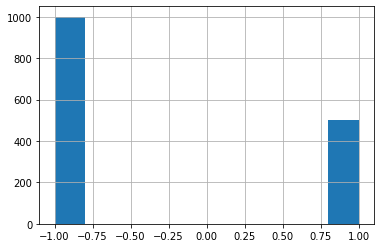

In [ ]:
# Frecuencia de classes
dados['d'].hist()

In [ ]:
X = dados.iloc[:,:-1]
X.head()

,x1,x2
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,2.0,2.0
4,3.0,3.0


In [ ]:
y = dados.iloc[:,-1]
y.head()

0    1.0
1   -1.0
2   -1.0
3    1.0
4    1.0
Name: d, dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [ ]:
X_train.shape

In [ ]:
y_train.shape

In [ ]:
Px1 = dados.pivot_table('x1', index = 'x1', columns='d', aggfunc='count',fill_value = 0)/[1000,500]
Px1

d,-1.0,1.0
x1,,
0.0,0.218,0.000
1.0,0.432,0.280
2.0,0.350,0.364
3.0,0.000,0.356


In [ ]:
Px2 = dados.pivot_table('x2', index = 'x2', columns='d', aggfunc='count',fill_value = 0)/[1000,500]
Px2

d,-1.0,1.0
x2,,
0.0,0.365,0.000
1.0,0.383,0.308
2.0,0.252,0.440
3.0,0.000,0.252


In [ ]:
novo = [1,0]
novo

[1, 0]

In [ ]:
Px1_1 = np.array(Px1[-1])
Px1_2 = np.array(Px1[1])
atributos = [0,1,2,3]

In [ ]:
for i in (np.array(Px1[-1])):
  print(i)

0.218
0.432
0.35
0.0


### (a) (2 pontos) Defina um classificador considerando a distribuição de probabilidade dos atributos para cada uma das classes. Forneça a regra de classificação associada a tal classificador.

In [ ]:
#P(X=-1)
p1 = (dados[dados.d == -1]).shape[0] / dados.shape[0]
p1

In [ ]:
#P(X=1)
p2 = (dados[dados.d == 1]).shape[0] / dados.shape[0]
p2

In [ ]:
# Para dados com rotulo -1
n1 = (dados[dados.d == -1]).shape[0]
x1 = np.arange(n1+1)
dist1 = [binom.pmf(r, n1, p1) for r in x1]

In [ ]:
data = binom.rvs(n=n1,p=p1,size=1000)
ax = sns.distplot(data,
                  bins=100,
                  kde=False,
                  color='blue',
                )
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.show()

In [ ]:
plt.bar(x1, dist1)
plt.show()

In [ ]:
# Para dados com rotulo -1
n2 = (dados[dados.d == 1]).shape[0]
x2 = np.arange(n2+1)
dist2 = [binom.pmf(r, n2, p2) for r in x2]

In [ ]:
data = binom.rvs(n=n2,p=p2,size=10000)
ax = sns.distplot(data,
                  bins=100,
                  kde=False,
                  color='blue',
                )
ax.set(xlabel='Binomial Distribution', ylabel='Frequency')

plt.show()

In [ ]:
plt.bar(x2, dist2)
plt.show()

### (b) (2 pontos) Calcule a acurácia (proporção de classificações corretas) do classificador obtido em (a).

### (c) (2 pontos) Defina um classificador considerando a distribuição de probabilidade dos atributos para cada uma das classes, bem como a proporção das classes. Forneça a regra de classificação associada a tal classificador.

### (d) (2 pontos) Calcule a acurácia (proporção de classificações corretas) do classificador obtido em (c).

### (e) (2 pontos) Compare os resultados obtidos pelos classificadores (a) e (c).